# Lab 2: cleaning operations practice with the Adult dataset
In this lab, we will practice what we learned in the clearning operations lab, but now we use a larger dataset, __Adult__, which we already used in the previous lab . We start by loading the data as we have done before, as well as the necessary libraries. We will look at how to generate train/validation/test partitions, as well as how to do some cleaning of outliers on those, or balancing of training sets.  We will also look at how to assess the problem of missing values and how to impute those by a couple of techniques.  


In [1]:
import pandas as pd
import numpy as np
#pd.set_option('max_rows', 15)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


## Loading the data

Now we begin by loading the data as we have done before and printing the `.head()` and `.tail()` to inspect the data.  Also produce a `countplot` of the target variable _income_ to observe the distribution of classes. Load the data as the _Adult_data_ data frame.  We will use that through the lab.

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

<Axes: xlabel='income', ylabel='count'>

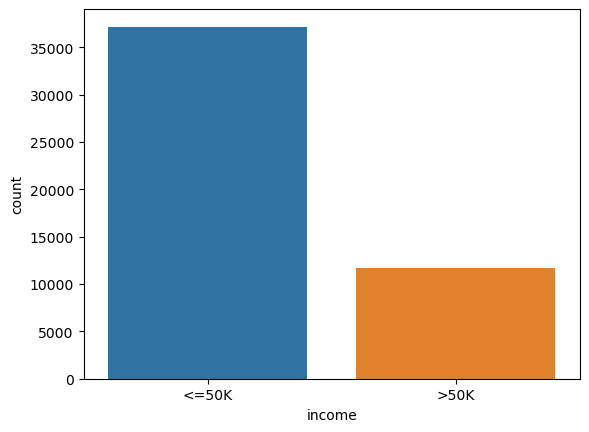

In [2]:
#designate the path where you saved your Iris data
Adult_data_path = "C:\Web-Programming\Adult.csv"

#Load the data using pandas read_csv function. This will generate a data frame we will use through the lab.
Adult_data = pd.read_csv(Adult_data_path)

#Show the first and last few records to check data is loading correctly
print(Adult_data.head())
print(Adult_data.tail())

#Show distribution of the class on whole dataset
sns.countplot(x= 'income', data=Adult_data)

As in the previous lab, we specify the columns which are: "age", "workclass", "fnlwgt", "education",  "educational-num", "marital-status", "occupation", "relationship", "race", "gender", "capital-gain", "capital-loss", "hours-per-week", "native-country".

In [3]:
COLUMNS = ["age", "workclass", "fnlwgt", "education",  "educational-num",
           "marital-status", "occupation", "relationship", "race", "gender",
           "capital-gain", "capital-loss", "hours-per-week", "native-country"]

We will also specify two lists,  one which contains the __categorical columns__, and one which contains the __numeric columns__ of interest.   The categorical columns of interest are: "workclass", "education", "marital-status", "occupation","relationship", "race", "gender", "native-country".  The numeric columns are: "age", "education-num", "capital-gain", "capital-loss", "hours-per-week". We will exclude _fnlwgt_ as it is not a particularly useful variable and we will see this soon. 

In [4]:
CATEGORICAL_COLUMNS = ["workclass", "education", "marital-status", "occupation",
                       "relationship", "race", "gender", "native-country"]
CONTINUOUS_COLUMNS = ["age", "educational-num", "capital-gain", "capital-loss",
                      "hours-per-week"]

We can start by creating a `boxplot` of the `adult_data` (which will include the numeric variables only in it by default. What can we see in it?  Is there any problematic variables? 

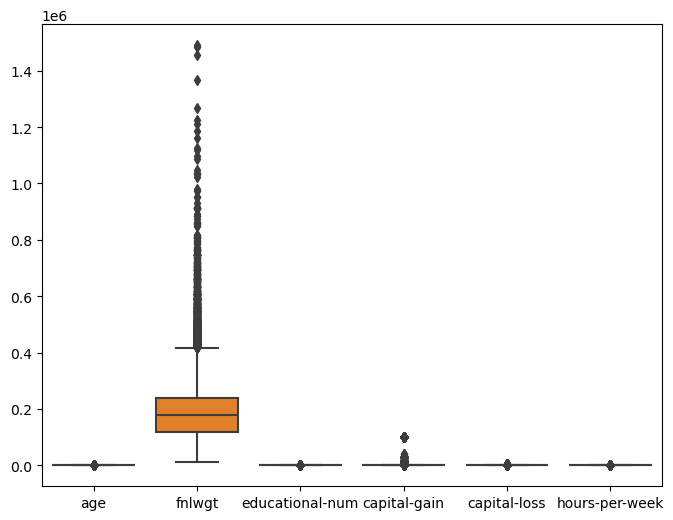

In [5]:
plt.figure(figsize=(8,6))
sns.boxplot(data=Adult_data)
plt.show()

We can now designate our X or input variables.   Once assigned look at the `.head()` of X. 

In [6]:
#Designate the continuous input features as X
X= Adult_data[COLUMNS]
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


Now designate the outcome or target variable as _y_ and look at the `.head() to see what we get.

In [7]:
#Designate the outcome or target variable as y
y = Adult_data.income
y.head()

0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
Name: income, dtype: object

## Sampling (train/validation/test)

First, let us divide the Adult dataset into train/validation/test partitions.  We first designated 20% for a test partition, call it _test_X_.  The remainder we can call _part1_X_ as a first partition to be later subdivided.  We then subdivide the partition _part1_X_ into train/validate.  For the second partition we will make we also designate 20% as the validation set. We will not use the test set until the final stage of testing the model, but we can use the validation set to test any intermediary decision as we later build models for classification.

So we start by sampling and dividing the original X,y into the part1_X/test_X and part1_y/test_y with the `train_test_split` method and looking at each with the `describe()` method.

In [8]:
from sklearn.model_selection import train_test_split

# Without stratification divide into first partition and test set.
part1_X,test_X, part1_y, test_y= train_test_split (X,y, test_size=0.2,random_state=1)

print(part1_X.describe())
print(test_X.describe())

                age        fnlwgt  educational-num  capital-gain  \
count  39073.000000  3.907300e+04     39073.000000  39073.000000   
mean      38.588207  1.900714e+05        10.072556   1067.195327   
std       13.695509  1.059839e+05         2.570352   7426.475044   
min       17.000000  1.349200e+04         1.000000      0.000000   
25%       28.000000  1.175560e+05         9.000000      0.000000   
50%       37.000000  1.784780e+05        10.000000      0.000000   
75%       48.000000  2.383670e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  39073.000000    39073.000000  
mean      86.108796       40.390269  
std      399.342390       12.335446  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  
               age        fnlwgt  educational

Now we sample by dividing the _part1_X_ partition into a Train/Validation partition and we also inspect it with `.describe()`. We can compare _train_X, val_X and test_X_, the three sets we have obtained.

In [9]:
# Without stratification divide the first partition 
train_X,val_X, train_y, val_y= train_test_split (part1_X,part1_y, test_size=0.2,random_state=1)

print("Train set description \n", train_X.describe())
print("Validation set description \n",val_X.describe())
print("Test set description \n",test_X.describe())

Train set description 
                 age        fnlwgt  educational-num  capital-gain  \
count  31258.000000  3.125800e+04     31258.000000  31258.000000   
mean      38.635261  1.898641e+05        10.072781   1120.123136   
std       13.696651  1.065069e+05         2.564230   7733.523514   
min       17.000000  1.349200e+04         1.000000      0.000000   
25%       28.000000  1.173212e+05         9.000000      0.000000   
50%       37.000000  1.781035e+05        10.000000      0.000000   
75%       48.000000  2.385902e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  31258.000000    31258.000000  
mean      85.197997       40.417013  
std      397.546360       12.395490  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  
Validation set descri

## Outlier detection

We start now looking at outliers. For the purpose of looking at outliers, let us consider the continous columns we have already defined only so X can be equal to the CONTINUOUS_COLUMNS of the data frame. We can create a new train_X wich we can call train_OL_X with the CONTINUOUS_COLUMNS only.

In [10]:
#Designate the continuous input features as train_OL_X
train_OL_X= train_X[CONTINUOUS_COLUMNS]
train_OL_X.shape

(31258, 5)

## Outlier detection

We now try to detect outliers, first with the DBSCAN algorithm.  Since this file is rather large we do not print the objects with their allocation (outliers designated as -1, or not outliers) but we can print the total number of outliers found.  We can also alter the parameters `min_samples` and `eps` to see the effect on the outliers detected. Once you have the code working, experiment with the algorithm parameters to get a not too large number of outliers. We can apply this on the train data only, but to the one with continous columns, i.e. train_OL_X.

In [11]:
#import the implementation of this algorihm from sklearn
from sklearn.cluster import DBSCAN

#Use the algorithm for outlier detection, the retun in clusters will show the membership of each point
#Any point labelled as -1 is an outlier

outlier_detection = DBSCAN(min_samples = 3, eps = 10)
clusters = outlier_detection.fit_predict(train_OL_X)

#Count total number of outliers as count of those labelled as -1
TotalOutliers=list(clusters).count(-1)
#print (clusters)
print("Total number of outliers identified is: ",TotalOutliers)

Total number of outliers identified is:  548


We can now create a mask or filter to ensure only those rows that are not outliers are retained in a new data frame that we can later use for classification.  Let us create a new output variable _y1_ and input set of variables _X1_ which contain a filtered version of the original data frame. For this, we can create a mask which takes the value of `clusters!= -1`.  This will be a boolean array which we can then use to filter _y_ into a new version _y1_, and similarly _X_ into a new version _X1_.  Check the shape of the new X and y with `.shape` to see the size of each. The amount of rows should be equal to the rows in the original data frame minus the rows that were designated as outliers. Note that we need to filter the data frame that contains all the columns (_train_X, train_y_), and not just the numeric ones, as all columns will be needed for the classification algorithms.

In [12]:
# select all rows that are not outliers and create a boolean mask
mask = clusters != -1
# Apply mask to y and check shape
y1= train_y[mask]
print (y1.shape)

#Apply mask to X and check shape 
X1=train_X[mask]
print(X1.shape)

(30710,)
(30710, 14)


Let us now do similarly but using the `IsolationForest` algorithm.  Again, investigate the parameters to understand how many outliers are found as we change those paramaters.

In [13]:
#import the implementation of this algorihm from sklearn
from sklearn.ensemble import IsolationForest

#Use the algorithm for outlier detection, then use it to predict each point
#Any point labelled as -1 is an outlier
clf = IsolationForest(max_samples=31258, random_state = 1, contamination= 0.01)
preds = clf.fit_predict(train_OL_X)
#print(preds)
totalOutliers=0
for pred in preds:
    if pred == -1:
        totalOutliers=totalOutliers+1
print("Total number of outliers identified is: ",totalOutliers)


C:\Anaconda\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Total number of outliers identified is:  313


Again, we can create a mask or filter to ensure only those rows that are not outliers are retained in a new data frame that we can later use for classification.  Let us create a new output variable _y2_ and input set of variables _X2_ which contain a filtered version of the original data frame, this time with the isolation algorithm filter. For this, we can create a mask which takes the value of `preds!= -1`.  This will be a boolean array which we can then use to filter _train_y_ into a new version _y2_, and similarly _Train_X_ into a new version _X2_.  Again check the shape of the new X and y with `.shape` to see the size of each. 

In [14]:
# select all rows that are not outliers and create a boolean mask
mask = preds != -1
# Apply mask to y and check shape
y2= train_y[mask]
print (y2.shape)

#Apply mask to X and check shape 
X2=train_X[mask]
print(X2.shape)

(30945,)
(30945, 14)


Finally, we can try to run the LocalOutlierFactor algorithm on the Adult data.  Once this is done, if you wish to visualise the outliers, you could produce a graph similar to the one produced in the _CleaningExamples_ lab, but this time plot for example _age_ versus _educational_num_ (columns 0 and 1). You may not need to use limits on the x and y axis for this plot, or you will need to adapt them to the right values. 

Number of predicted outliers: 300


C:\Users\zfk12qja\AppData\Local\Temp\ipykernel_11760\1033036756.py:42: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [12]
C:\Users\zfk12qja\AppData\Local\Temp\ipykernel_11760\1033036756.py:43: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes = [20]


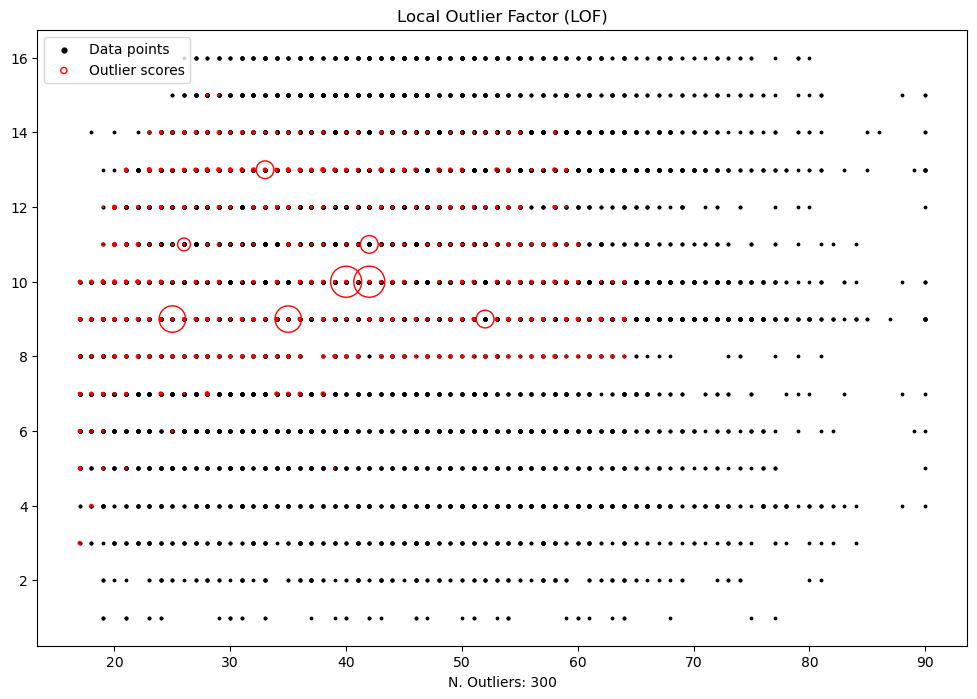

In [15]:
from sklearn.neighbors import LocalOutlierFactor
np.random.seed(42)

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.01)

# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(train_OL_X)

#print ("Predicted outliers: \n",y_pred)

#Calculate number of outliers
outlierN = len([i for i in y_pred if i == -1])
print ("Number of predicted outliers:",outlierN)


#Let us see graphically how the outliers are identified
#Use outlier scores calculated by the algorithm to plot a circle around the outlier proportional to score.

X_scores = clf.negative_outlier_factor_

plt.figure(figsize=(12,8))
plt.title("Local Outlier Factor (LOF)")

#Convert the df to an array for the purpose of the scatterplot
Xol = train_OL_X.to_numpy()

#Use scatter 
plt.scatter(Xol[:, 0], Xol[:, 1], color='k', s=3, label='Data points')

# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(Xol[:, 0], Xol[:, 1], s=500 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
#plt.xlim((0, 14))
#plt.ylim((0, 6))
plt.xlabel("N. Outliers: %d" % (outlierN))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [12]
legend.legendHandles[1]._sizes = [20]
plt.show()

Again, we filter to ensure only those rows that are not outliers are retained in a new data frame that we can later use for classification.  Let us create a new output variable _y3_ and input set of variables _X3_ which contain a filtered version of the original data frame, this time with the LOF algorithm filter, similar to the previous to cells. 

In [16]:
# select all rows that are not outliers and create a boolean mask
mask = y_pred != -1
# Apply mask to y and check shape
y3= train_y[mask]
print (y3.shape)

#Apply mask to X and check shape 
X3=train_X[mask]
print(X3.shape)

(30958,)
(30958, 14)


If you wish to save any of the dataframes you have created to load them elsewhere you can do that with the `.to_csv()` method.  You can pass inside as parameters the path and file name and `index = False` if you don't wish to save the index.  Alternatively, you can repeat the code above to get the data frame in a later lab.

In [17]:
#Save X1 to a file for later use if necessary
X1.to_csv("C:\Web-Programming\X1.csv", index = False)

## Balancing of the data

Now we will practice balancing the data.  We can apply balancing operations to the original training data, or we could apply it to any of the versions with outliers removed if we later decided that removing the outliers may be beneficial.  Let us use the original training data ignoring outlier removal for the time being. We can start by producing a count of how many rows are there for each label using the `value_counts()` method on the _train_y_ series.

In [18]:
train_y.value_counts()

<=50K    23805
>50K      7453
Name: income, dtype: int64

Now we will try to produce a balanced sample but instead of doing it from the whole file, as we do not want to balance the test data, we wil do it from the training data only, the _train_X_ data frame. First we need to concatanate the X and y part of the training data to apply balancing.  We can separate again later.   We can start by trying to upsample the minority class so they both have an equal number of samples.  We can look at the statistics of the upsampled data, together with the new value counts.

In [19]:
from sklearn.utils import resample

#The first thing is contatenate our training data back together.  
resampling = train_X.copy()
resampling['income']= train_y.values

# separate minority and majority classes
majority_class = resampling[resampling['income']=='<=50K']
minority_class = resampling[resampling['income']=='>50K']

# Upsample minority class
minority_upsampled = resample(minority_class, 
                                 replace=True,     # sample with replacement
                                 n_samples=23805,     # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
upsampled = pd.concat([majority_class, minority_upsampled])

# Show dataset statistics
print(upsampled.describe())
 
# Display new class counts
upsampled.income.value_counts()



                age        fnlwgt  educational-num  capital-gain  \
count  47610.000000  4.761000e+04     47610.000000  47610.000000   
mean      40.557446  1.892139e+05        10.581601   2173.527893   
std       12.986638  1.058789e+05         2.612961  11006.047986   
min       17.000000  1.349200e+04         1.000000      0.000000   
25%       31.000000  1.175830e+05         9.000000      0.000000   
50%       40.000000  1.769980e+05        10.000000      0.000000   
75%       49.000000  2.364248e+05        13.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  47610.000000    47610.000000  
mean     119.122096       42.214556  
std      470.885744       12.217361  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       50.000000  
max     4356.000000       99.000000  


<=50K    23805
>50K     23805
Name: income, dtype: int64

We may now want to produce another `countplot` to compare the class imbalance.

<Axes: xlabel='income', ylabel='count'>

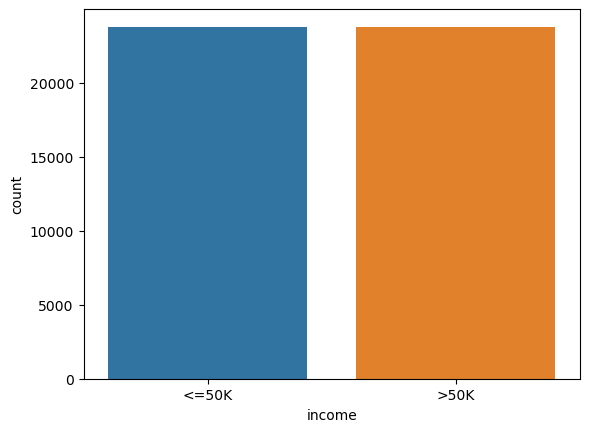

In [20]:
#Show distribution of the class on whole dataset
sns.countplot(x= 'income', data=upsampled)

Additionally, we may produce a `stripplot` to understand how the data was distributed for the two classes in the original data frame, _Adult_data_ and then another one for how it is distributed in the new upsampled data for comparison. 

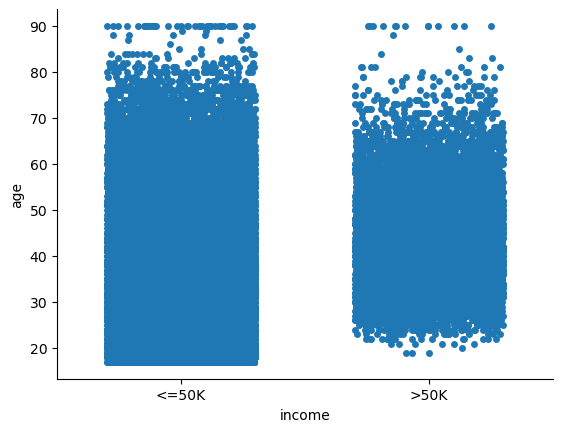

In [21]:
sns.stripplot(x=Adult_data['income'],y=Adult_data['age'],data=Adult_data, jitter=0.3)
sns.despine()

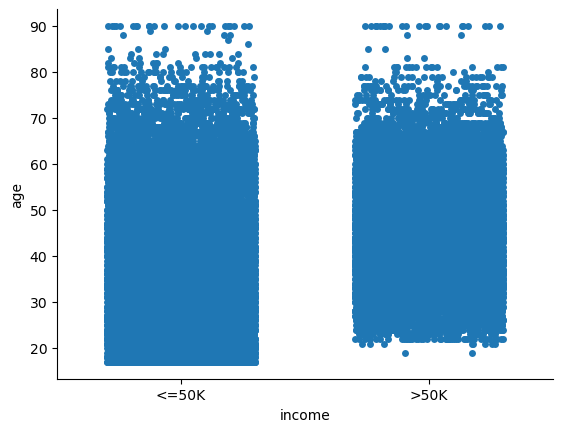

In [22]:
sns.stripplot(x=upsampled['income'],y=upsampled['age'],data=upsampled, jitter=0.3)
sns.despine()

Now, we do similarly, but this time we downsample the majority class to produce a reduced balanced dataset.  We look at value counts and after we can produce a `countplot` to look at the distribution of values in the classes.

In [23]:
# Downsample majority class
majority_downsampled = resample(majority_class, 
                                 replace=False,    # sample without replacement
                                 n_samples=7453,     # to match minority class
                                 random_state=123) # reproducible results
    
# Combine minority class with downsampled majority class
downsampled = pd.concat([majority_downsampled, minority_class])
 
# Display new class counts
downsampled.income.value_counts()

<=50K    7453
>50K     7453
Name: income, dtype: int64

<Axes: xlabel='income', ylabel='count'>

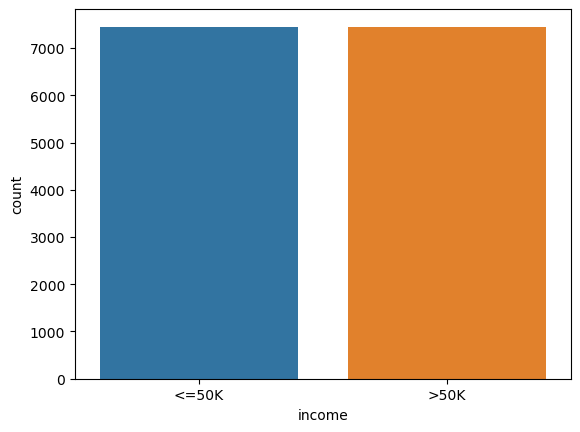

In [24]:
#Show distribution of the class on whole dataset
sns.countplot(x= 'income', data=downsampled)

Again a `stripplot` can show the distribution of points within the classes in the downsampled data frame.

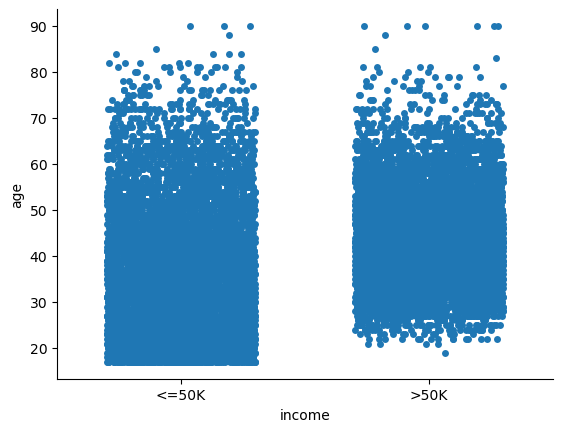

In [25]:
sns.stripplot(x=downsampled['income'],y=downsampled['age'],data=downsampled, jitter=0.3)
sns.despine()

Now you could chose to use either your dowsampled or upsampled training data as the data to classify.  For this you will need to divide the _X_ part (decision variables) from the _y_ part (target variable), before feeding to any classification algorithms. Attempt that for the upsampled data. 

In [26]:
#Designate the continuous input features as X
upsampled_X=upsampled[COLUMNS]
print(upsampled_X.head())
print("Shape of training data:",upsampled_X.shape,"\n")

#Designate the outcome or target variable as y
upsampled_y = upsampled.income
print(upsampled_y.head())
print("Shape of training data:",upsampled_y.shape,"\n")

       age         workclass  fnlwgt     education  educational-num  \
14072   48           Private  309212  Some-college               10   
34328   52  Self-emp-not-inc  240013       Masters               14   
41446   25           Private  233461    Assoc-acdm               12   
606     30           Private  101562       HS-grad                9   
42951   34           Private  174789     Bachelors               13   

           marital-status       occupation   relationship   race  gender  \
14072            Divorced  Exec-managerial  Not-in-family  White  Female   
34328  Married-civ-spouse            Sales        Husband  White    Male   
41446       Never-married     Tech-support  Not-in-family  White    Male   
606         Never-married     Adm-clerical  Not-in-family  White  Female   
42951       Never-married    Other-service  Not-in-family  White    Male   

       capital-gain  capital-loss  hours-per-week native-country  
14072             0             0              40

## Missing data

Now we will get to deal with missing data. First thing is to understand how missing data, if there is any, is represented in the dataset we are looking at. The distribution graphs we did in the previous lab for the Adult data frame showed that _occupation_, _workclass_ and _native_country_ appeared to have missing values represented as '?'.  We can start by replacing all values of _'?'_ in the data frame with _nan_, the representation of missing data in _numpy_. For this  the `.replace()` method can be used with the first parameter being what we want to replace, i.e. '?' and the second being what we want to replace it with, i.e. _nan_.  We need to make missing data consistently represented in the whole dataset so we apply this to the _Adult_data_ data frame.

In [27]:
from numpy import nan
Adult_data = Adult_data.replace('?', nan)

Now, we can count how many missing (i.e. nan) numbers there are in the data frame as a whole. Then how many there are in each column or variable.

In [28]:
# get the number of missing data points per column
missing_values_count = Adult_data.isnull().sum()

# look at the # of missing points in the  columns
print(missing_values_count[0:15])


age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


We now start by removing all rows that contain a missing value.  How many rows are left?

In [29]:
# remove all the rows that contain a missing value
Adult_data.dropna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Difficulty (High): Finally, we look at how to impute the data.  However, we may need to use different methods for categorical and numeric data.  Let us create a `class` _DataFrameIputer_ which takes the 'TransformerMixin' class from scikit-learn  https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html and uses the mean values for numeric columns and the most frequent value for non-numeric columns.  After that, we can use the new class to transform our data and input the missing values in the process.  

In [30]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):
        # Find most common value with value_counts() which returns 
        # counts in descending order so that the first element is the most frequently-occurring element.
        self.fill = pd.Series([X[c].value_counts().index[0]
            #Use that if type is object otherwise use mean                   
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


#Define the data to be filled as X, we can pass the whole data frame and apply our new class
X = Adult_data
xt = DataFrameImputer().fit_transform(X)

print('before...')
#Let us see missing value for the train data before
missing_val_count_by_column = (X.isnull().sum())
print('Missing columns for the Train data:\n',missing_val_count_by_column[missing_val_count_by_column>0])

#and after
print('after...')
missing_val_count_by_column = (xt.isnull().sum())
print('Missing columns for the Train data:\n',missing_val_count_by_column[missing_val_count_by_column>0])




before...
Missing columns for the Train data:
 workclass         2799
occupation        2809
native-country     857
dtype: int64
after...
Missing columns for the Train data:
 Series([], dtype: int64)


Note that we could have used imputation only on the training part of the data frame, although if the classification algorithm we are going to use does not accept missing data, then we may need to apply the imputation on the whole dataset as we just did.  

Now that is all for this lab!!! We have created a number of data frames we may use in later labs for classification so make sure you save your work ready for re-use later. 